<a href="https://colab.research.google.com/github/Manav-Khandurie/Fin-Sight/blob/main/model/Major1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [3]:
data_train=pd.read_csv("/content/TrainingData.csv")
data_test=pd.read_csv("/content/TestData.csv")


In [4]:
data_train.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
data_train.dtypes

,0
Id,int64
Income,int64
Age,int64
Experience,int64
Married/Single,object
House_Ownership,object
Car_Ownership,object
Profession,object
CITY,object
STATE,object


In [9]:

column_unique_values = {col: data_train[col].unique() for col in data_train.columns}

# Display the unique values for each column
for column_name, unique_values in column_unique_values.items():
    print(f"{column_name}: {unique_values}")

Id: [     1      2      3 ... 251998 251999 252000]
Income: [1303834 7574516 3991815 ... 2843572 4522448 9070230]
Age: [23 40 66 41 47 64 58 33 24 78 22 28 57 48 39 71 56 54 50 72 36 76 38 31
 52 59 21 26 55 45 77 63 30 25 73 75 27 74 67 46 68 79 42 60 32 65 49 35
 61 29 37 69 62 53 70 34 43 44 51]
Experience: [ 3 10  4  2 11  0 14 17 12  7  9  6  8  1 13 19 15 20  5 16 18]
Married/Single: ['single' 'married']
House_Ownership: ['rented' 'norent_noown' 'owned']
Car_Ownership: ['no' 'yes']
Profession: ['Mechanical_engineer' 'Software_Developer' 'Technical_writer'
 'Civil_servant' 'Librarian' 'Economist' 'Flight_attendant' 'Architect'
 'Designer' 'Physician' 'Financial_Analyst' 'Air_traffic_controller'
 'Politician' 'Police_officer' 'Artist' 'Surveyor' 'Design_Engineer'
 'Chemical_engineer' 'Hotel_Manager' 'Dentist' 'Comedian'
 'Biomedical_Engineer' 'Graphic_Designer' 'Computer_hardware_engineer'
 'Petroleum_Engineer' 'Secretary' 'Computer_operator'
 'Chartered_Accountant' 'Technician' 'M

In [ ]:
data_train.shape

(252000, 13)

In [ ]:
data_test.shape

(28000, 12)

In [ ]:
data_train.isnull()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,False,False,False,False,False,False,False,False,False,False,False,False,False
251996,False,False,False,False,False,False,False,False,False,False,False,False,False
251997,False,False,False,False,False,False,False,False,False,False,False,False,False
251998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data_train_cleaned=data_train.drop(columns=["Id"])
data_test_cleaned=data_test.drop(columns=["ID"])

data_train_cleaned["Risk_Flag"]=data_train_cleaned["Risk_Flag"].map({1:"YES",0:"NO"})

#Taking only the columns we need

data_train_con=data_train_cleaned[["Income","Age","Experience","CURRENT_JOB_YRS","CURRENT_HOUSE_YRS"]]
data_train_cat=data_train_cleaned[["Married/Single","House_Ownership","Car_Ownership","Profession","CITY","STATE"]]
target=data_train_cleaned[["Risk_Flag"]]

In [ ]:
data_train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  object
dtypes: int64(5), object(7)
memory usage: 23.1+ MB


In [ ]:
#Unique values in categorical variables
for col in data_train_cat.columns:
    print(col,data_train_cat[col].nunique())

print(target.nunique())

Married/Single 2
House_Ownership 3
Car_Ownership 2
Profession 51
CITY 317
STATE 29
Risk_Flag    2
dtype: int64


In [ ]:
pd.set_option('display.float_format',lambda x:'%.5f' % x)
data_train_con.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
count,252000.00000,252000.00000,252000.00000,252000.00000,252000.00000
mean,4997116.66533,49.95407,10.08444,6.33388,11.99779
std,2878311.01361,17.06385,6.00259,3.64705,1.39904
min,10310.00000,21.00000,0.00000,0.00000,10.00000
25%,2503015.00000,35.00000,5.00000,3.00000,11.00000
50%,5000694.50000,50.00000,10.00000,6.00000,12.00000
75%,7477502.00000,65.00000,15.00000,9.00000,13.00000
max,9999938.00000,79.00000,20.00000,14.00000,14.00000


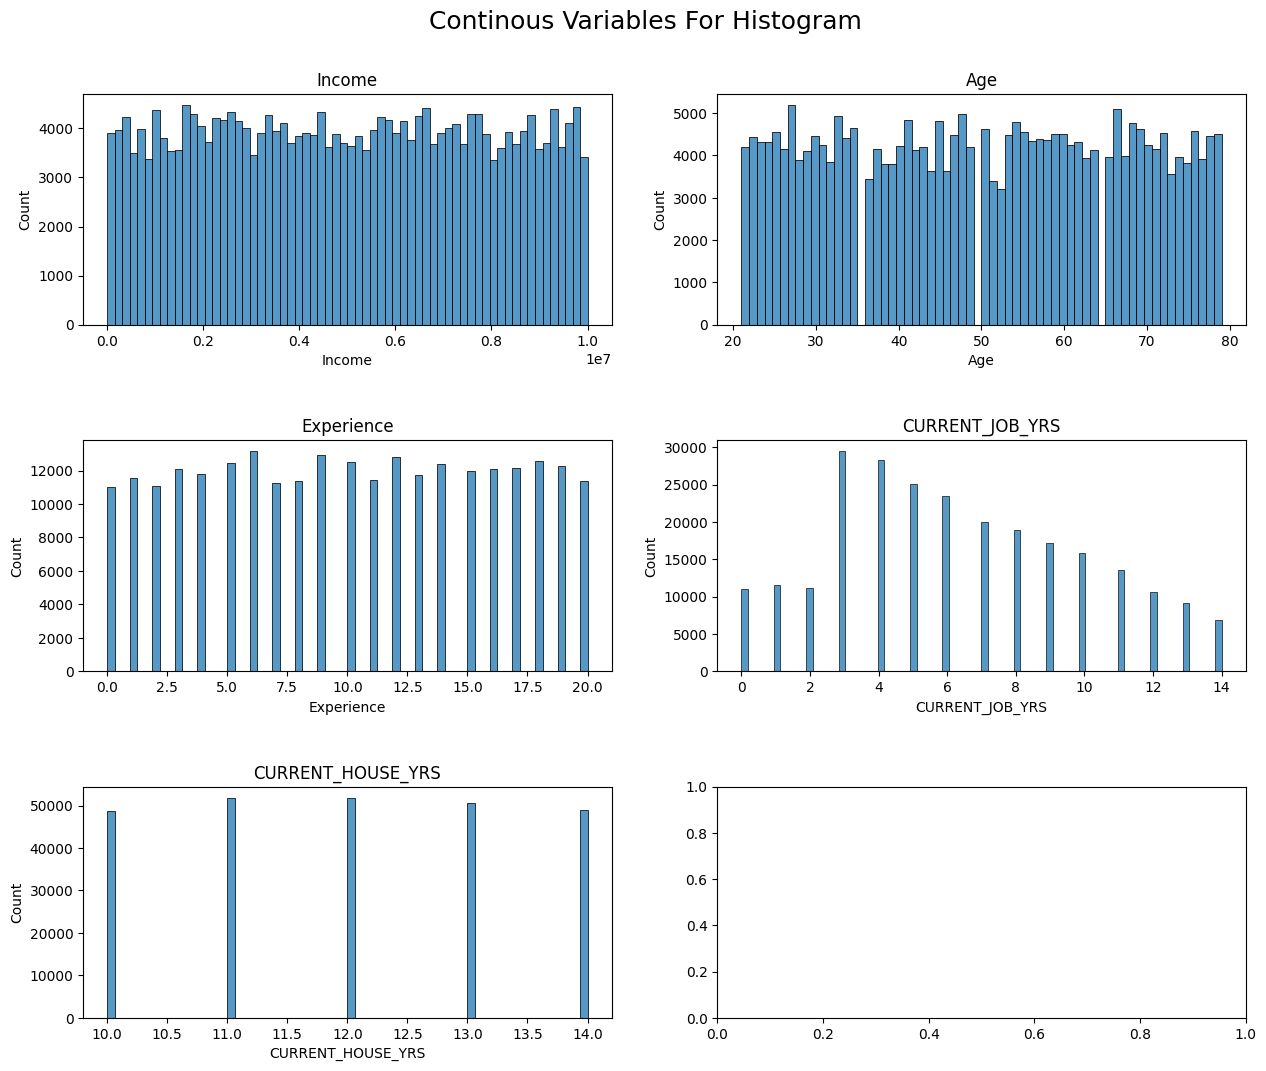

In [ ]:
fig,axs=plt.subplots(nrows=3,ncols=2,figsize=(15,12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Continous Variables For Histogram",fontsize=18,y=0.95)

for col,ax in zip(data_train_con.columns,axs.ravel()):
    sns.histplot(ax = ax ,data=data_train_con, x= col).set(title=col)

plt.show()

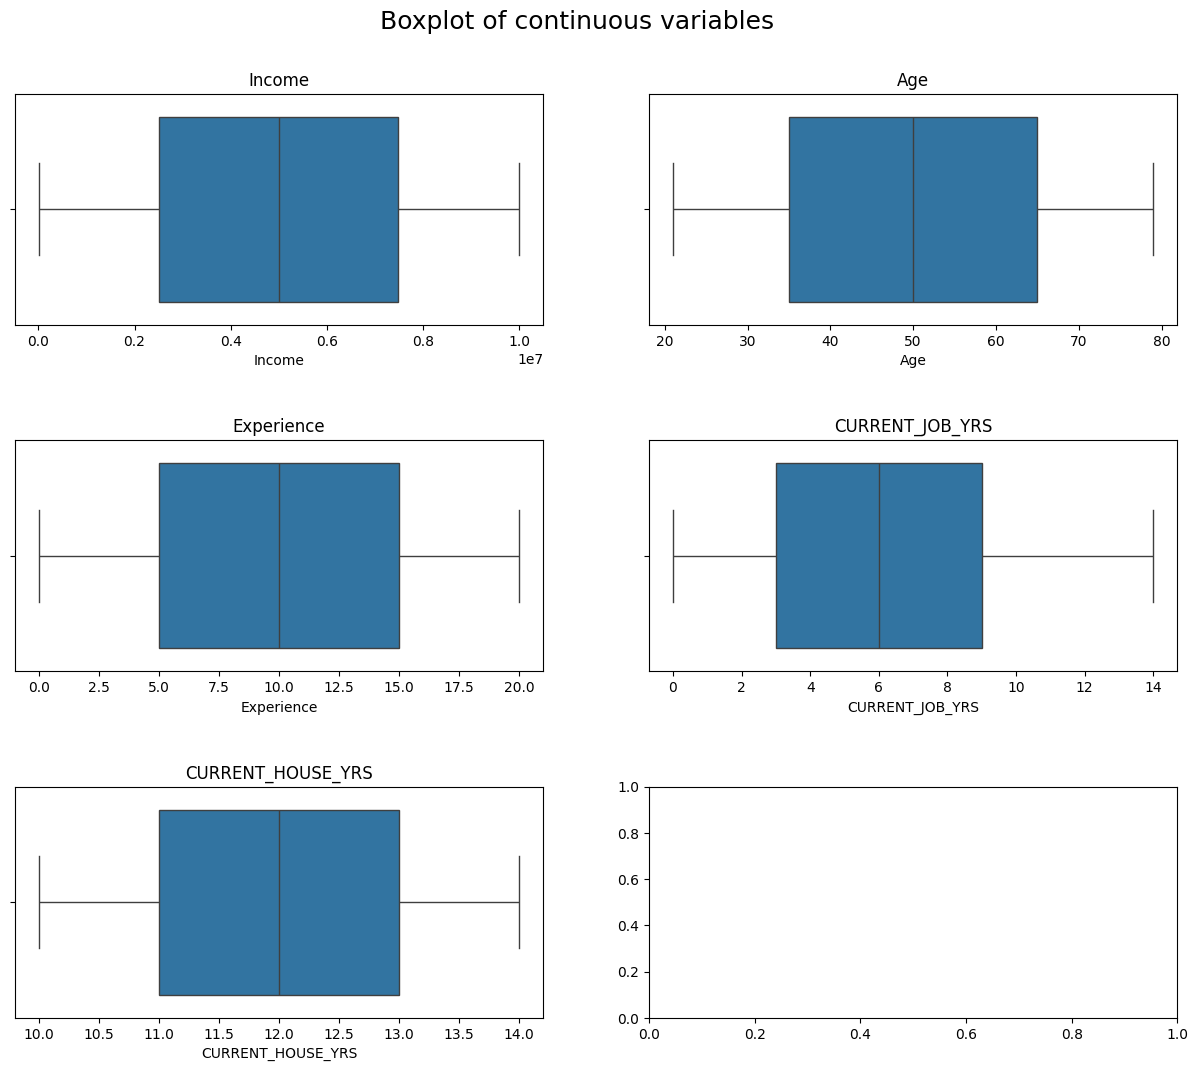

In [ ]:
fig,axs =plt.subplots(nrows=3,ncols=2,figsize=(15,12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Boxplot of continuous variables",fontsize=18,y=0.95)

for col,ax in zip(data_train_con.columns,axs.ravel()):
     sns.boxplot(ax = ax ,data=data_train_con, x= col).set(title=col)

plt.show()

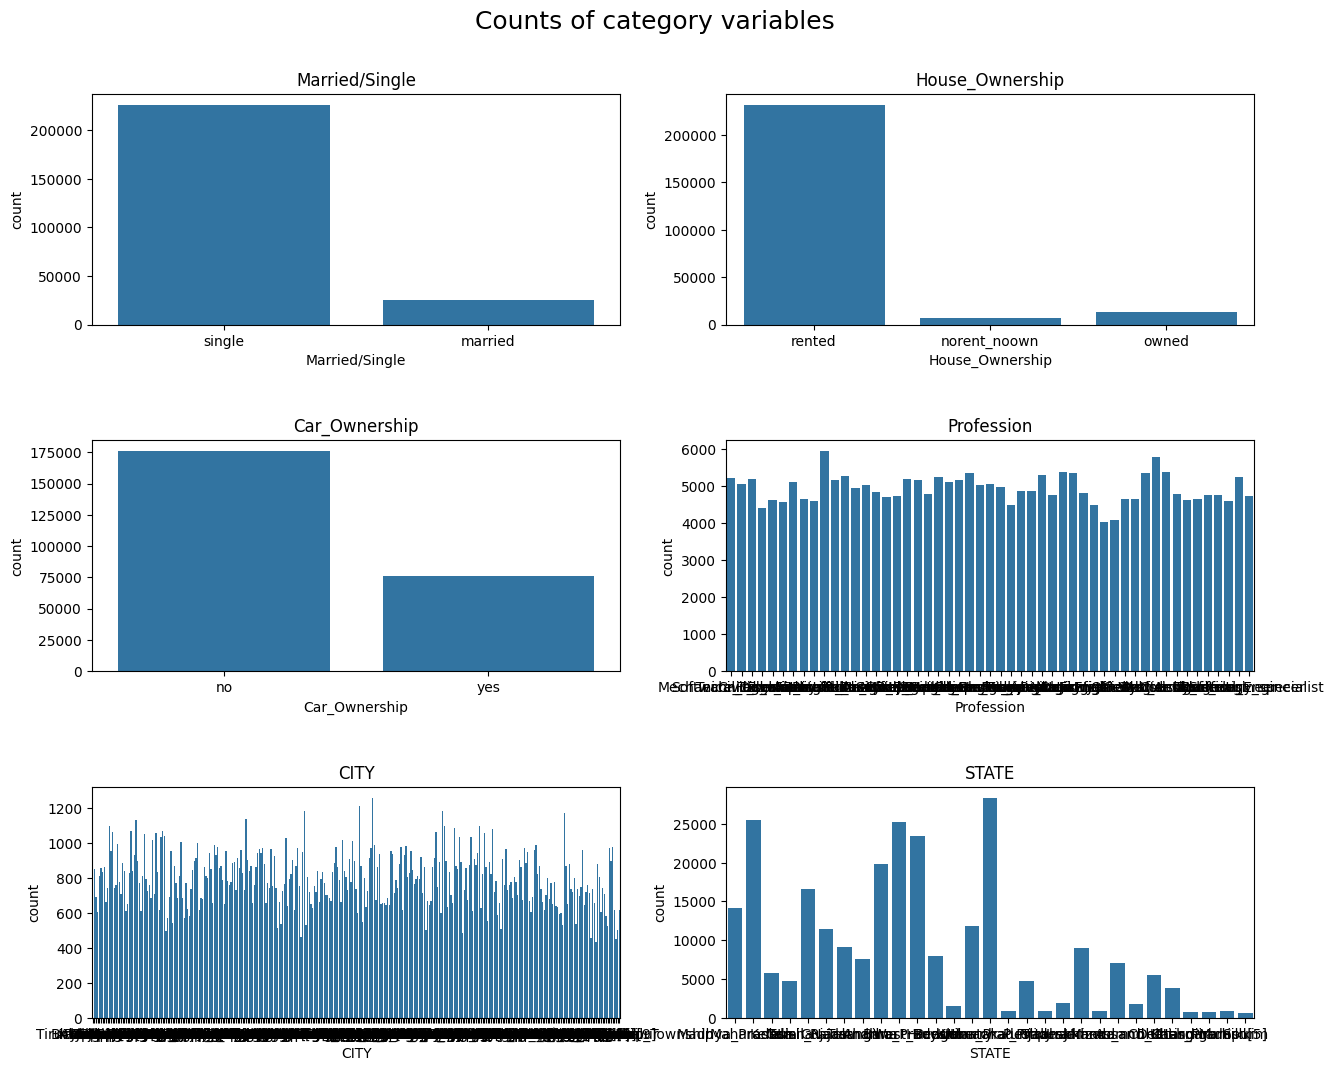

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Counts of category variables", fontsize=18, y=0.95)


for col , ax in zip(data_train_cat.columns , axs.ravel()):
    countplot = sns.countplot(ax = ax ,data=data_train_cat, x= col)
    countplot.set_title(col)
plt.show()

<ipython-input-15-30c9ba6e82c5>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  countplot.set_xticklabels(countplot.get_xticklabels(), rotation=45, horizontalalignment='right')
<ipython-input-15-30c9ba6e82c5>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  countplot.set_xticklabels(countplot.get_xticklabels(), rotation=45, horizontalalignment='right')
<ipython-input-15-30c9ba6e82c5>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  countplot.set_xticklabels(countplot.get_xticklabels(), rotation=45, horizontalalignment='right')


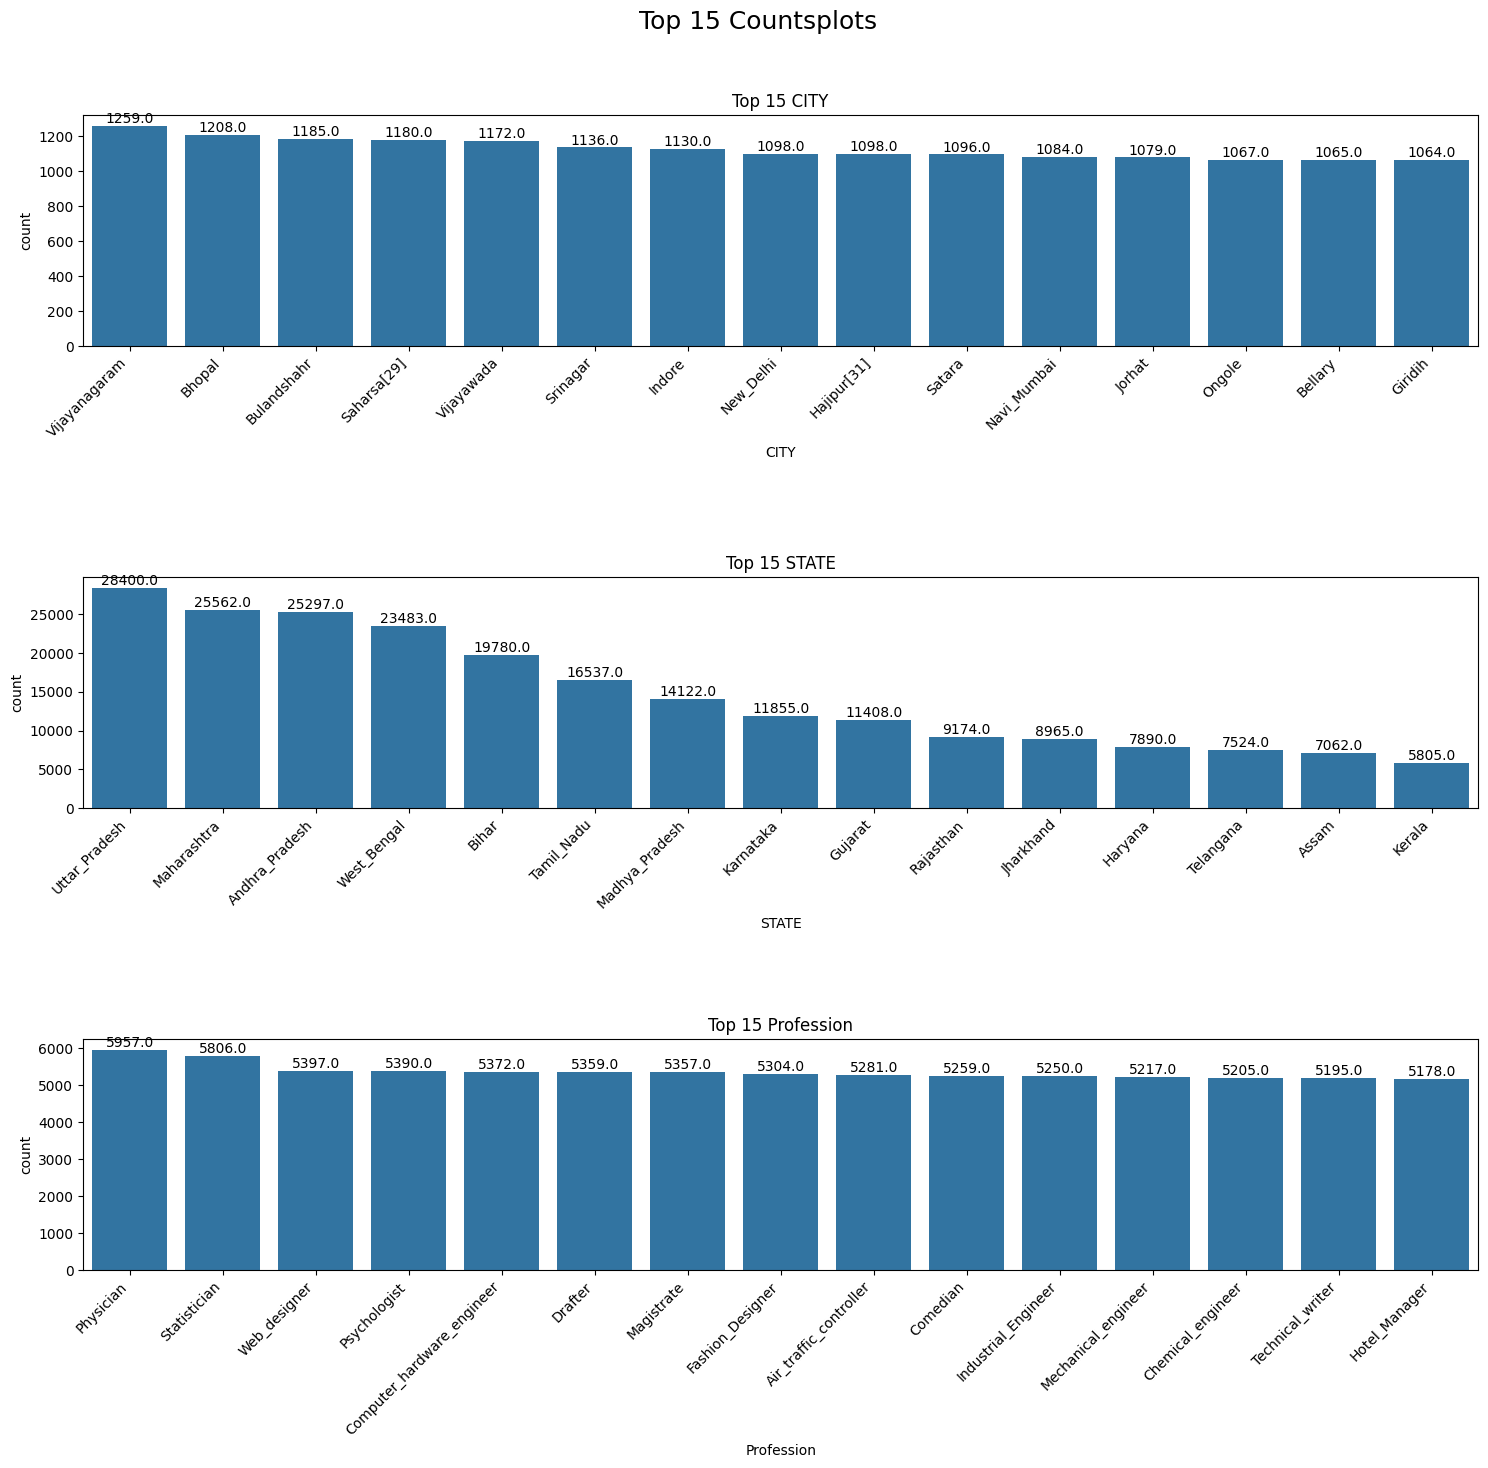

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(18, 15))
plt.subplots_adjust(hspace=1)
fig.suptitle("Top 15 Countsplots", fontsize=18, y=0.95)



for col , ax in zip(['CITY','STATE', 'Profession'] , axs.ravel()):
    countplot = sns.countplot(ax = ax ,data=data_train_cat,  x= col , order=data_train_cat[col].value_counts().iloc[:15].index)
    countplot.set_title("Top 15 "+ col)
    countplot.set_xticklabels(countplot.get_xticklabels(), rotation=45, horizontalalignment='right')
    for p in countplot.patches:
        countplot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='center', xytext=(0, 5), textcoords='offset points')


plt.show()

<ipython-input-17-8d435129990d>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  top_plot.set_xticklabels(top_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
<ipython-input-17-8d435129990d>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  bottom_plot.set_xticklabels(bottom_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
<ipython-input-17-8d435129990d>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  top_plot.set_xticklabels(top_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
<ipython-input-17-8d435129990d>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  bottom_plot.set_xticklabels(bottom_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
<ipython-input-17-8d435129990d>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  top_plot.set_xticklabels(top_plot.get_xtick

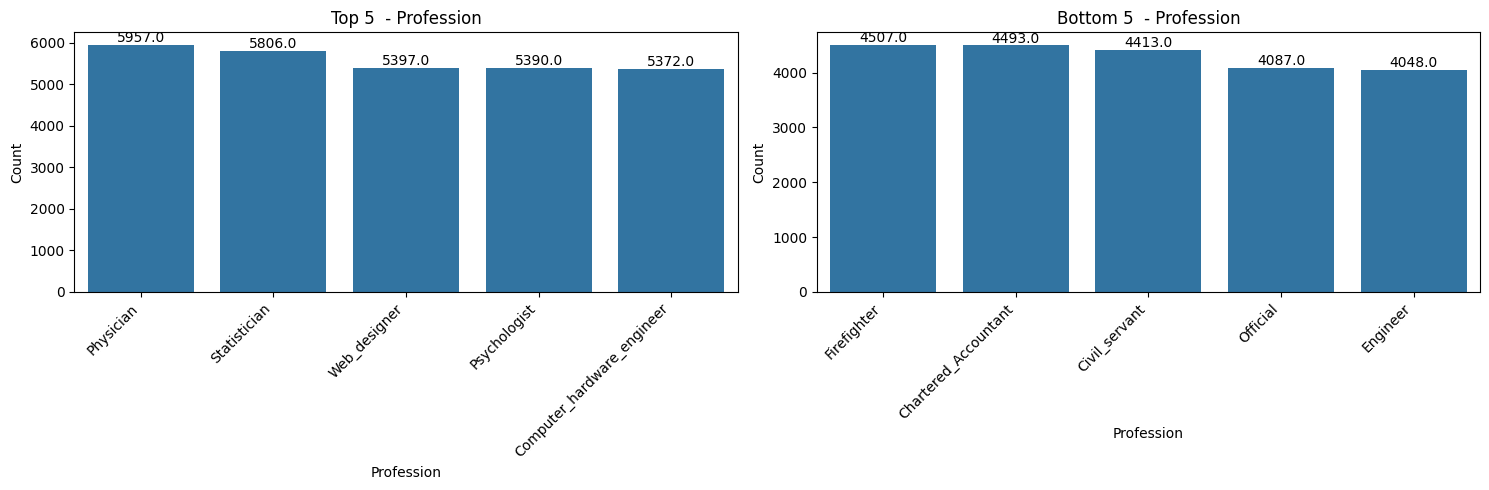

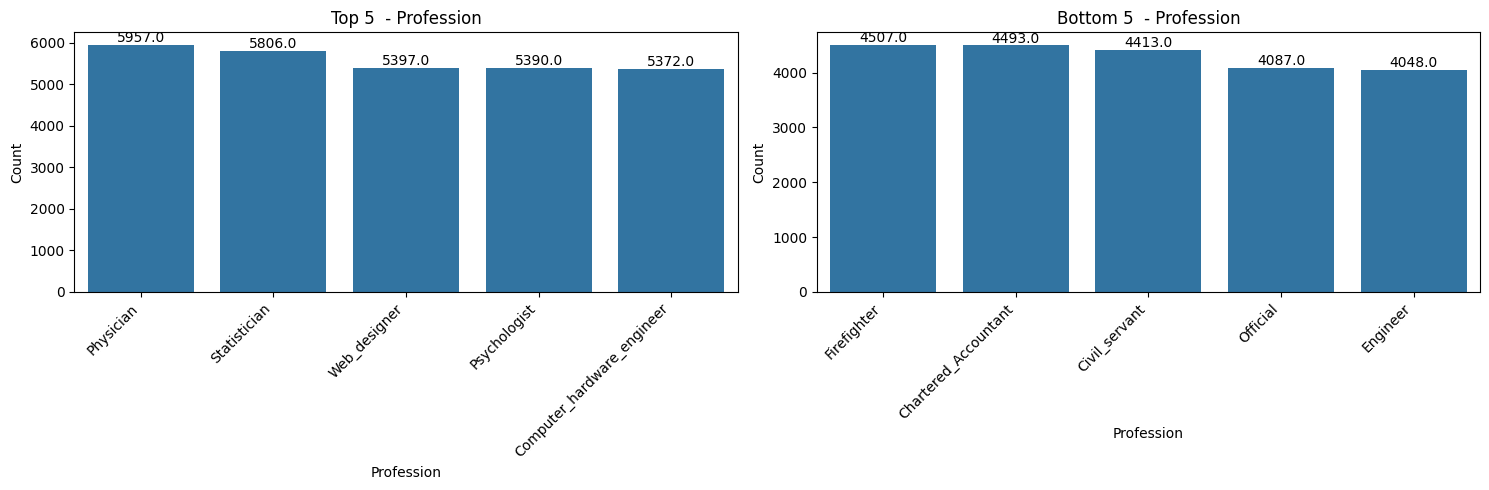

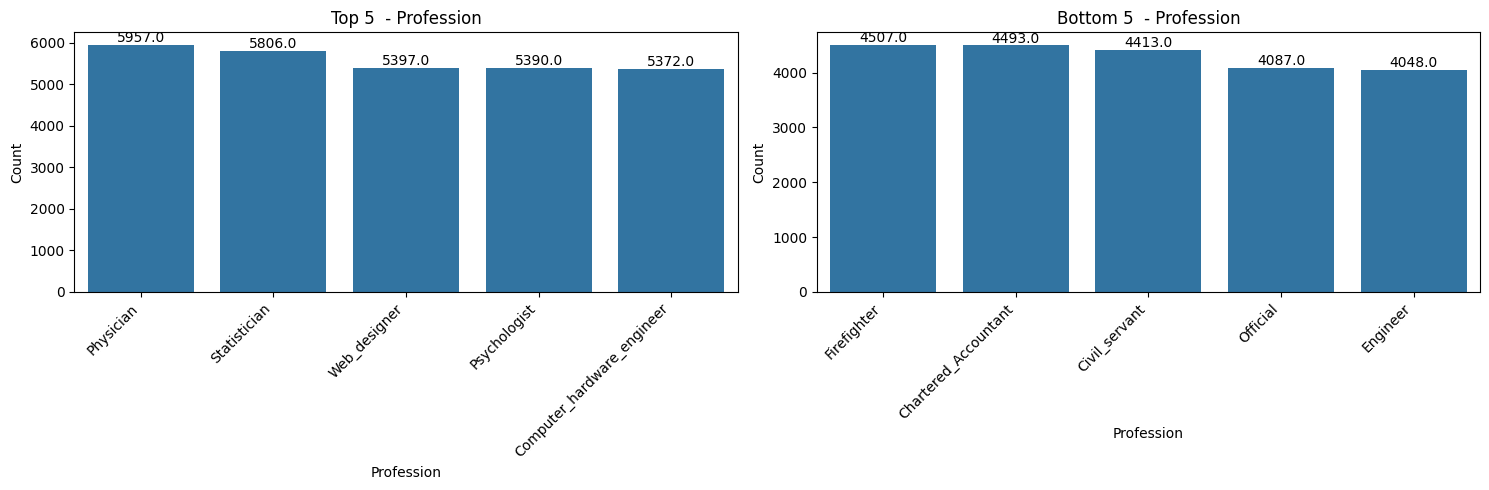

In [ ]:
# Comparing the Top 5th Counts category with the Last 5th counts category
# Create a function that will produce two coutplots with respective counts comparision
def generate_count_plots(df , column_name):
    # Count the occurrences of each category in the column
    value_counts = df[column_name].value_counts()

    # Get the top 5 and bottom 5 categories based on their counts
    top_5_categories = value_counts.head(5)
    bottom_5_categories = value_counts.tail(5)

    # Create a figure with two subplots (top 5 and bottom 5)
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

     # Plot the top 5 categories
    top_plot = sns.barplot(x=top_5_categories.index, y=top_5_categories.values, ax=axes[0])

    axes[0].set_title(f"Top 5  - {column_name}")
    axes[0].set_ylabel("Count")
    top_plot.set_xticklabels(top_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
    for p in top_plot.patches:
        top_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    # Plot the bottom 5 categories

    bottom_plot = sns.barplot(x=bottom_5_categories.index, y=bottom_5_categories.values, ax=axes[1])

    axes[1].set_title(f"Bottom 5  - {column_name}")
    axes[1].set_xlabel(f"{column_name}")
    axes[1].set_ylabel("Count")
    bottom_plot.set_xticklabels(bottom_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
    for p in bottom_plot.patches:
        bottom_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='center', xytext=(0, 5), textcoords='offset points')



    # Adjust layout and display the plots
    plt.tight_layout()
for  ol in["CITY",'STATE','Profession']:
      generate_count_plots(data_train_cat,col)

Text(0.5, 1.0, 'Risk_Flag')

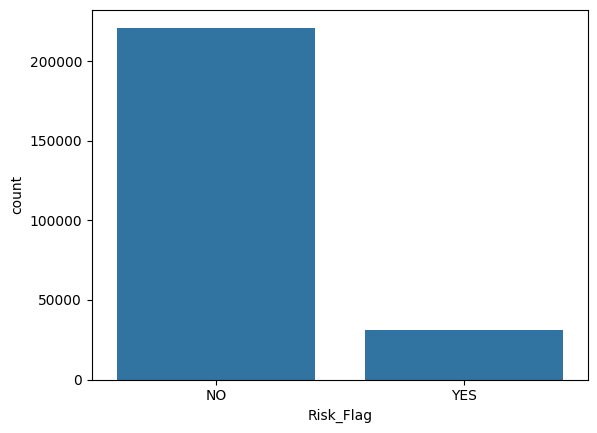

In [ ]:
#target variable

fig=plt.plot(figsize=(18,15))
sns.countplot(data=data_train_cleaned,x="Risk_Flag")
countplot.set_title("Risk_Flag")

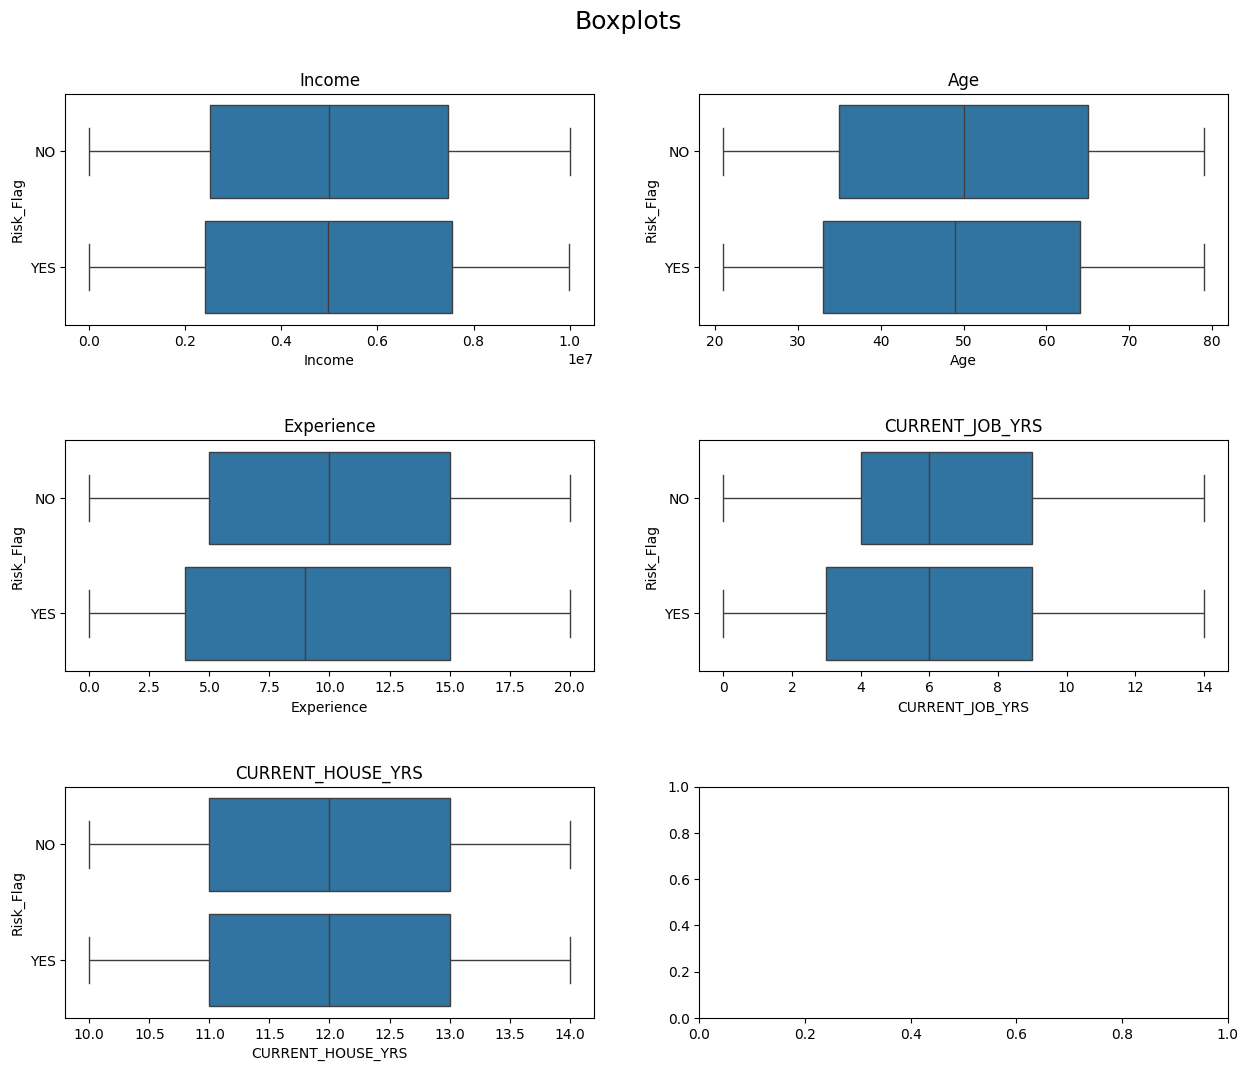

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Boxplots", fontsize=18, y=0.95)


for col , ax in zip(data_train_con.columns , axs.ravel()):
    boxplot = sns.boxplot(ax = ax ,data=data_train_cleaned, x= col , y = "Risk_Flag")
    boxplot.set_title(col)

plt.show()

In [ ]:
def chi_square_test(df , col , target):
    contingency_table = pd.crosstab(df[col], data_train_cleaned[target])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    print("Is there a correlation between :" + col + " and " + target + "?" )
    print(contingency_table)
    print("Chi-squared value:", chi2)
    print("p-value:", p_value)
    if p_value <= 0.05:
        print('The variables are Dependent (reject H0)')
    else:
        print('The variables are Independent (H0 holds true)')
for col  in ['Married/Single', 'House_Ownership' , 'Car_Ownership']:
                    chi_square_test(data_train_cleaned , col , 'Risk_Flag')
                    print(" ")

Is there a correlation between :Married/Single and Risk_Flag?
Risk_Flag           NO    YES
Married/Single               
married          23092   2636
single          197912  28360
Chi-squared value: 111.89204667099783
p-value: 3.773053705715196e-26
The variables are Dependent (reject H0)
 
Is there a correlation between :House_Ownership and Risk_Flag?
Risk_Flag            NO    YES
House_Ownership               
norent_noown       6469    715
owned             11758   1160
rented           202777  29121
Chi-squared value: 182.98924138871385
p-value: 1.8381930028370595e-40
The variables are Dependent (reject H0)
 
Is there a correlation between :Car_Ownership and Risk_Flag?
Risk_Flag          NO    YES
Car_Ownership               
no             153439  22561
yes             67565   8435
Chi-squared value: 145.42374419378916
p-value: 1.7350853850183746e-33
The variables are Dependent (reject H0)
 


In [ ]:
cols = ['Married/Single','Car_Ownership','Profession','CITY','STATE','Risk_Flag', 'House_Ownership']
le = preprocessing.LabelEncoder()
for col in cols:
    data_train_cleaned[col] = le.fit_transform(data_train_cleaned[col])


cols = ['Married/Single','Car_Ownership','Profession','CITY','STATE']
le = preprocessing.LabelEncoder()
for col in cols:
    data_test_cleaned[col] = le.fit_transform(data_test_cleaned[col])

In [ ]:
df_tmp = data_train_cleaned
y = df_tmp['Risk_Flag']
X = df_tmp.drop(columns = ['Risk_Flag'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
223480,1759916,33,0,1,0,0,19,220,18,0,10
177039,1325345,66,8,1,2,0,23,193,25,8,14
85476,3971141,67,16,1,2,0,19,232,14,13,13
243408,2252102,33,8,1,2,0,32,254,13,8,11
116275,3770663,53,5,1,2,1,50,73,22,5,12
...,...,...,...,...,...,...,...,...,...,...,...
176963,9422918,77,11,1,2,0,42,24,14,9,13
117952,7716196,27,5,1,2,0,33,158,5,5,14
173685,2557871,55,14,1,2,1,6,86,1,3,12
43567,8914067,77,18,1,2,1,20,80,5,10,11


In [ ]:
import joblib
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print(accuracy)

joblib.dump(model, 'model_LR.pkl')

0.8781547619047619


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['model_LR.pkl']

In [ ]:
import joblib

model = DecisionTreeClassifier(criterion="entropy",random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print(accuracy)

joblib.dump(model, 'model_DTC.pkl')

0.8825198412698413


['model_DTC.pkl']